In [1]:
import numpy as np
import matplotlib.pyp_values_values_values_valueslot as plt
from utils.calc_p import asymptotic_expectation_zero, objective
from scipy.optimize import fsolve

ModuleNotFoundError: No module named 'matplotlib.pyp_values_values_values_valueslot'

### 实验p与J的关系
Setting: 保证平稳reward=0时，p只有一个解  
$ \mu = 0, log(p) \sim -J $, 

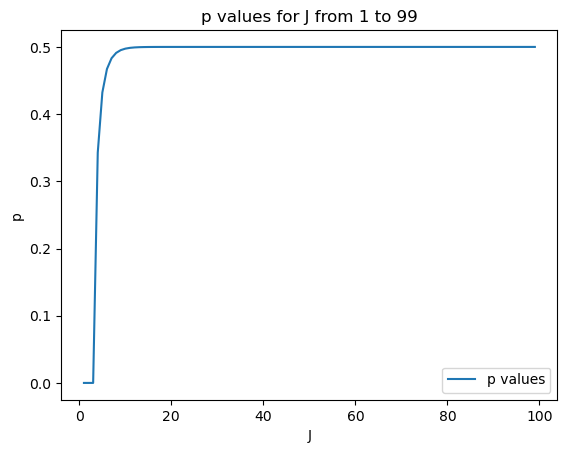

In [ ]:
# 定义J的范围 1-100太大了，可以适当缩小范围
J_values = np.arange(1, 100)

# 初始猜测p值
p_initial_guess = 0.5

# 存储每个J对应的p值
p_values = []

# 计算每个J对应的p值
for J in J_values:
    p_solution = fsolve(objective, p_initial_guess, args=(J))
    p_values.append(p_solution[0])

# 绘制J与p值的关系曲线
plt.plot(J_values[:], p_values[:], label='p values')
plt.xlabel('J')
plt.ylabel('p')
plt.title(f'p values for J from {J_values[0]} to {J_values[-1]}')
plt.legend()
plt.show()

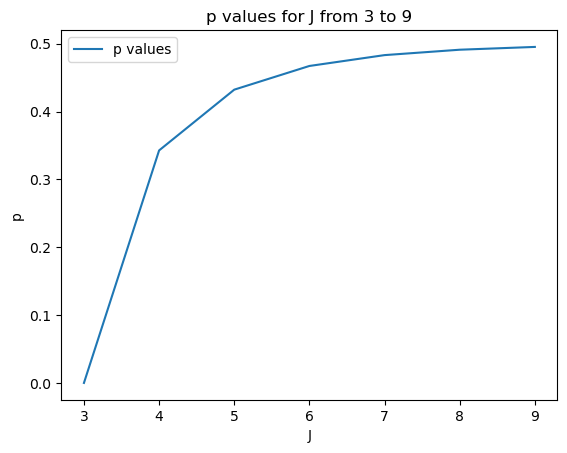

In [ ]:
# 定义J的范围 3-10 差不多还能经常触发一下
J_values = np.arange(3, 10)

# 初始猜测p值
p_initial_guess = 0.5
# p_initial_guess = 1e-8

# 存储每个J对应的p值
p_values = []

# 计算每个J对应的p值
for J in J_values:
    p_solution = fsolve(objective, p_initial_guess, args=(J))
    p_values.append(p_solution[0])

# 绘制J与p值的关系曲线
plt.plot(J_values, p_values, label='p values')
plt.xlabel('J')
plt.ylabel('p')
plt.title(f'p values for J from {J_values[0]} to {J_values[-1]}')
plt.legend()
plt.show()

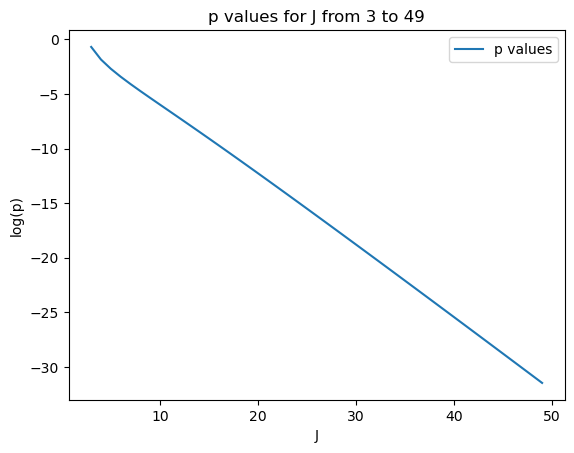

In [ ]:
# 探究log(p)与J的关系
J_values = np.arange(3, 50)

# 初始猜测p值
p_initial_guess = 0.5
# p_initial_guess = 1e-8 ??

# 存储每个J对应的p值
p_values = []

# 计算每个J对应的p值 平衡状态
for J in J_values:
    p_solution = fsolve(objective, p_initial_guess, args=(J))
    p_values.append(p_solution[0])

# 绘制J与p值的关系曲线
plt.plot(J_values, np.log(0.5-np.array(p_values)), label='p values')
plt.xlabel('J')
plt.ylabel('log(p)')
plt.title(f'p values for J from {J_values[0]} to {J_values[-1]}')
plt.legend()
plt.show()

##### $p^o$和(p,J)的关系

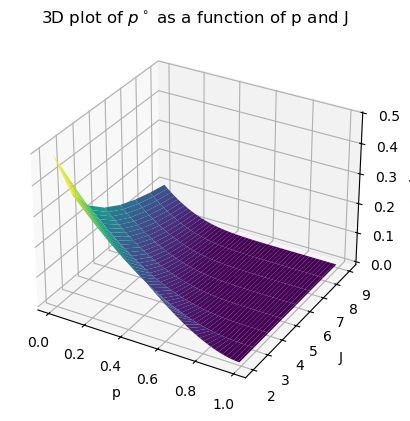

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# numerator = p * (1 - p)**J
# denominator = 1 - (1 - p)**J
# p_circ = numerator / denominator
# 定义p和J的范围
p_values = np.linspace(0.01, 0.99, 100)  # 避免p为0或1导致分母为0
J_values = np.arange(2, 10)

# 创建网格
P, J = np.meshgrid(p_values, J_values)

# 计算p_star
numerator = P * (1 - P)**J
denominator = 1 - (1 - P)**J
p_circ = numerator / denominator

# 绘制三维图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(P, J, p_circ, cmap='viridis')

ax.set_xlabel('p')
ax.set_ylabel('J')
ax.set_zlabel('p_circ')
ax.set_title('3D plot of $p^\circ$ as a function of p and J')

plt.show()

##### $p^\star$和(p,J)的关系

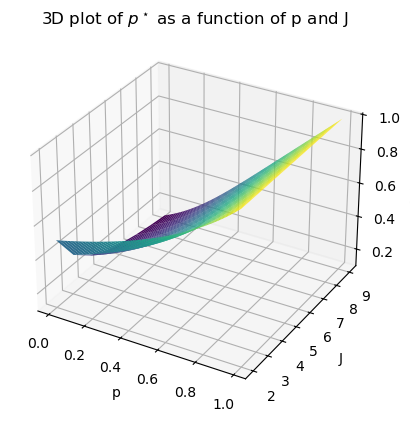

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# numerator = p * (1 - p)**J
# denominator = 1 - (1 - p)**J
# p_star = P + numerator / denominator
# 定义p和J的范围
p_values = np.linspace(0.01, 0.99, 100)  # 避免p为0或1导致分母为0
J_values = np.arange(2, 10)

# 创建网格
P, J = np.meshgrid(p_values, J_values)

# 计算p_star
numerator = P * (1 - P)**J
denominator = 1 - (1 - P)**J
p_star = P + numerator / denominator

# 绘制三维图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(P, J, p_star, cmap='viridis')

ax.set_xlabel('p')
ax.set_ylabel('J')
ax.set_zlabel('p_star')
ax.set_title('3D plot of $p^\star$ as a function of p and J')

plt.show()

看的出来hit frequency大的时候，因为保证$\mu^*$ = 1 ,因此会使得$\mu$是较大的

### $p^o$和J的定量关系 given 老虎机赢钱概率p

Text(0.5, 1.0, '3D plot of p_star as a function of p and J')

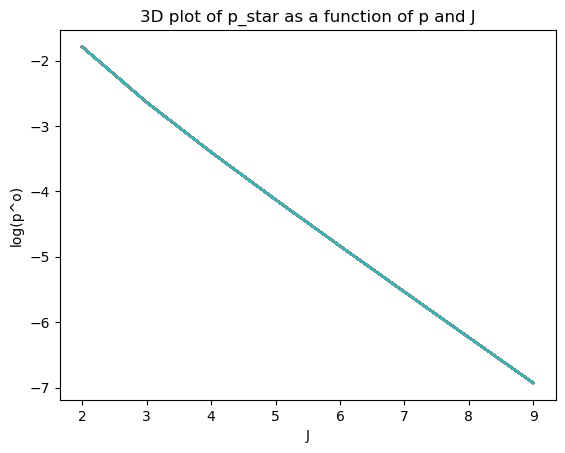

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# numerator = p * (1 - p)**J
# denominator = 1 - (1 - p)**J
# p_star = numerator / denominator
# 定义p和J的范围
# p_values = np.linspace(0.01, 0.99, 100)  # 避免p为0或1导致分母为0
J_values = np.arange(2, 10)
p_values = np.array([0.5])

# 计算p_star
numerator = p_values * (1 - p_values)**J
denominator = 1 - (1 - p_values)**J
p_star = numerator / denominator

# 绘制三维图
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(J_values, np.log(p_star))

ax.set_xlabel('J')
ax.set_ylabel('log(p^o)')
# ax.set_ylabel('p^o')
ax.set_title('3D plot of p_star as a function of p and J')

### $\mu$和p的关系 given J 且$\mu^*=1$

Text(0.5, 1.0, '2D plot of p_star as a function of p and J')

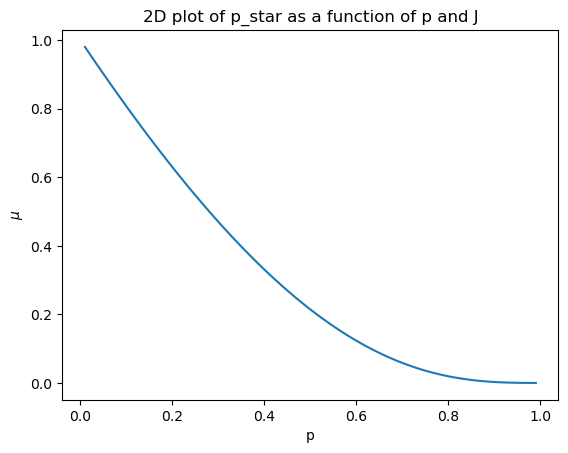

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# numerator = p * (1 - p)**J
# denominator = 1 - (1 - p)**J
# p_star = numerator / denominator
# 定义p和J的范围
p_values = np.linspace(0.01, 0.99, 100)  # 避免p为0或1导致分母为0
J_values = 3
# p_values = np.array([0.5])

# 计算p_star
numerator = p_values * (1 - p_values)**J_values
denominator = 1 - (1 - p_values)**J_values
p_star = numerator / denominator

# 绘制三维图p
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(p_values, J_values*p_star)

ax.set_xlabel('p')
ax.set_ylabel('$\mu$')
# ax.set_ylabel('p^o')
ax.set_title('2D plot of p_star as a function of p and J')

### hit frequency $p^\star$和p的关系 given J 

Text(0.5, 1.0, '2D plot of p_star as a function of p and J')

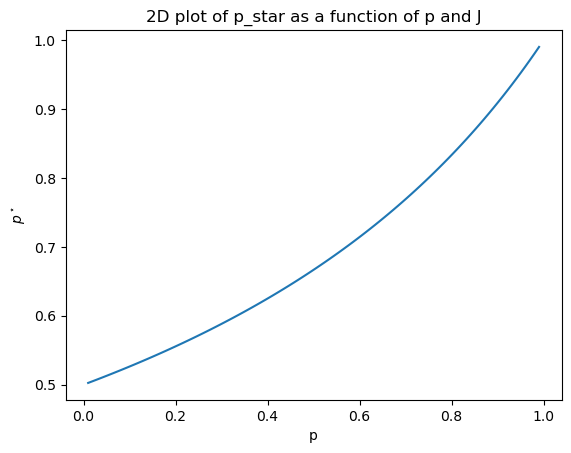

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# numerator = p * (1 - p)**J
# denominator = 1 - (1 - p)**J
# p_star = numerator / denominator
# 定义p和J的范围
p_values = np.linspace(0.01, 0.99, 100)  # 避免p为0或1导致分母为0
J_values = 2
# p_values = np.array([0.5])

# 计算p_star
numerator = p_values * (1 - p_values)**J_values
denominator = 1 - (1 - p_values)**J_values
p_star = p_values + numerator / denominator

# 绘制三维图p
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(p_values, p_star)

ax.set_xlabel('p')
ax.set_ylabel('$p^\star$')
# ax.set_ylabel('p^o')
ax.set_title('2D plot of p_star as a function of p and J')

##### $Jp^o$和(p,J)的关系 从中可以看出J变化的时候$Jp^o$如何变化；
##### 且如果p从设定开始就不动 调节$\mu$使得单臂公平的时候，是否J动则$Jp^o$会单调。

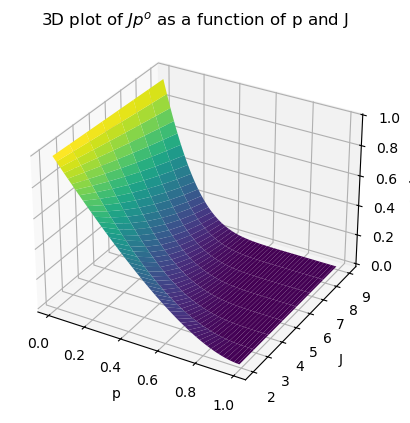

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# numerator = p * (1 - p)**J
# denominator = 1 - (1 - p)**J
# p_circ = numerator / denominator
# 定义p和J的范围
p_values = np.linspace(0.01, 0.99, 100)  # 避免p为0或1导致分母为0
J_values = np.arange(2, 10)

# 创建网格
P, J = np.meshgrid(p_values, J_values)

# 计算p_star
numerator = P * (1 - P)**J
denominator = 1 - (1 - P)**J
fut_reward = J*numerator / denominator

# 绘制三维图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(P, J, fut_reward, cmap='viridis')

ax.set_xlabel('p')
ax.set_ylabel('J')
ax.set_zlabel('p_circ')
ax.set_title('3D plot of $Jp^o$ as a function of p and J')

plt.show()

##### $Jp^o$和J的关系 观察p给定后J变化 是否最优手臂有会改朝换代。 

!!!卧槽不会改变，最优的手臂只会随着J的变化，可能很难区分，因为我们要改变的是\mu*p的值
Jp^\circ的变化
偏序关系不改变！

<Figure size 640x480 with 0 Axes>

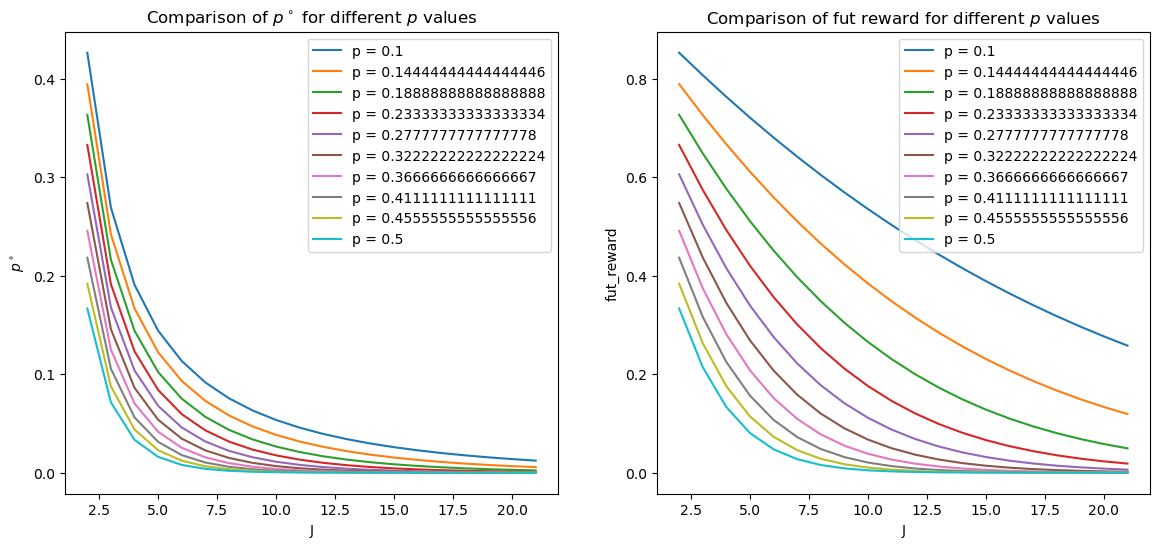

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 定义J的范围
J_values = np.linspace(2, 21, 20)
p_values = np.linspace(0.1, 0.5, 10)  # 避免p为0或1导致分母为0

# 绘制图形
fig = plt.figure()
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax = ax.flatten()

# 遍历每个p值，计算并绘制fut_reward
for p in p_values:
    numerator = p * (1 - p)**J_values
    denominator = 1 - (1 - p)**J_values
    p_circ = numerator / denominator
    ax[0].plot(J_values, p_circ, label=f'p = {p}')
    ax[1].plot(J_values, J_values*p_circ, label=f'p = {p}')

ax[0].set_xlabel('J')
ax[0].set_ylabel('$p^\circ$')
ax[0].set_title('Comparison of $p^\circ$ for different $p$ values')
ax[0].legend()

ax[1].set_xlabel('J')
ax[1].set_ylabel('fut_reward')
ax[1].set_title('Comparison of fut reward for different $p$ values')
ax[1].legend()
plt.show()
